In [1]:
from qiskit.quantum_info import random_density_matrix, Operator, Statevector, DensityMatrix, random_unitary, random_statevector, random_clifford, Pauli, SparsePauliOp
from qiskit.circuit import Parameter, ParameterVector, QuantumCircuit
from qiskit.circuit.library import RXGate, RYGate, RZGate
from qiskit.visualization import *
from qiskit.quantum_info import process_fidelity
from qiskit_algorithms.optimizers import SPSA

import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import minimize
from math import pi, cos, sin, sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from itertools import product

In [2]:
T = random_unitary(2)
U = None  # Initialize U

In [3]:
# Define the objective function to maximize
def objective_function(theta_values):
    global U  # Use the global U variable
    theta_1, theta_2, theta_3 = theta_values

    # Define the H and D states as needed
    psi_1 = Statevector.from_label("0")
    psi_2 = Statevector.from_label("+")

    # Calculate the U gate
    qc = QuantumCircuit(1)
    qc.rz(theta_1, 0)
    qc.rx(theta_2, 0)
    qc.rz(theta_3, 0)
    U = Operator(qc)

    # Calculate the probabilities
    psi_a = psi_1.evolve(T).evolve(U)
    psi_b = psi_2.evolve(T).evolve(U)

    prob_a = psi_a.expectation_value(psi_1).real
    prob_b = psi_b.expectation_value(psi_2).real
        
    # Calculate the product of probabilities to maximize
    return 1 - (prob_a * prob_b)

In [4]:
# Define a custom callback function to print intermediate results
def callback(func_evals, params, cost, stepsize, step_accepted):
    print(f"Func evals: {func_evals}")
    print(f"Theta Values: {params}")
    max_prob = 1 - cost
    print(f"Maximum Probability: {max_prob}\n")

In [12]:
# Initial guess for theta values
initial_theta_values = [0.0, 0.0, 0.0]

# Perform the optimization with the custom callback
spsa = SPSA(maxiter=300, callback=callback)
result = spsa.minimize(objective_function, x0=initial_theta_values, bounds=[(0, 2 * pi), (0, 2 * pi), (0, 2 * pi)])

# Extract the optimal theta values and the maximum probability
optimal_theta_values = result.x
max_probability = 1 - result.fun
num_of_func_evals = result.nfev

# Print the final optimal theta values and maximum probability
print("\nOptimal Theta Values:", optimal_theta_values)
print("Maximum Probability:", max_probability)
print(f"{num_of_func_evals=}")

Func evals: 3
Theta Values: [ 0.73034448 -0.73034448  0.73034448]
Maximum Probability: 0.4965272472885385

Func evals: 6
Theta Values: [ 0.76293383 -0.76293383  0.69775512]
Maximum Probability: 0.49683311896761984

Func evals: 9
Theta Values: [2.61358979 1.08772212 2.54841107]
Maximum Probability: 0.010579389506796044

Func evals: 12
Theta Values: [2.648232   1.05307991 2.58305329]
Maximum Probability: 0.011095853420646118

Func evals: 15
Theta Values: [2.68640982 1.01490209 2.62123111]
Maximum Probability: 0.011874013666335115

Func evals: 18
Theta Values: [2.69428837 1.00702354 2.61335256]
Maximum Probability: 0.011902015076416084

Func evals: 21
Theta Values: [2.59298176 0.90571693 2.51204595]
Maximum Probability: 0.02298869520004765

Func evals: 24
Theta Values: [2.45102836 0.76376353 2.65399934]
Maximum Probability: 0.04372926755207118

Func evals: 27
Theta Values: [2.26118762 0.57392279 2.84384008]
Maximum Probability: 0.08171601302518527

Func evals: 30
Theta Values: [1.94000738

In [6]:
process_fidelity(T @ U, Operator(np.eye(2)))

0.9999994546535045

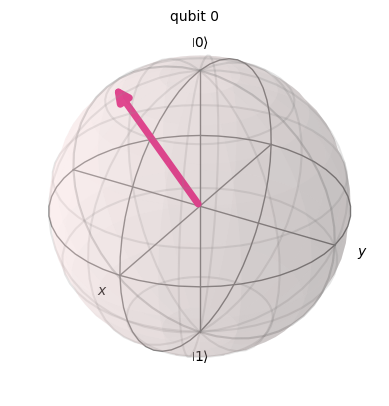

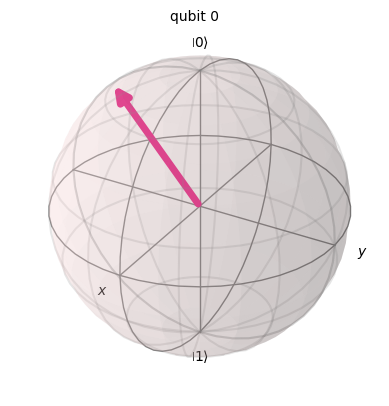

In [7]:
psi_test = random_statevector(2)
display(plot_bloch_multivector(psi_test))
display(plot_bloch_multivector(psi_test.evolve(T).evolve(U)))